In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("D:\\Backup\\Downloads\\archive (10)\\healthcare_dataset.csv")


In [4]:
# Overview of data
df.info()
df.describe(include='all')
df.isnull().sum()

# Convert to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate Length of Stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Standardize string columns
df['Gender'] = df['Gender'].str.title()
df['Admission Type'] = df['Admission Type'].str.title()
df['Test Results'] = df['Test Results'].str.title()
df['Medical Condition'] = df['Medical Condition'].str.title()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

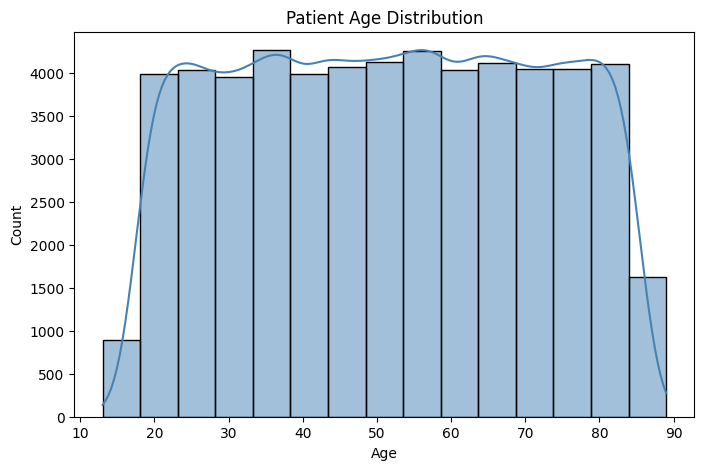

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='steelblue')
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_41388\3861136496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


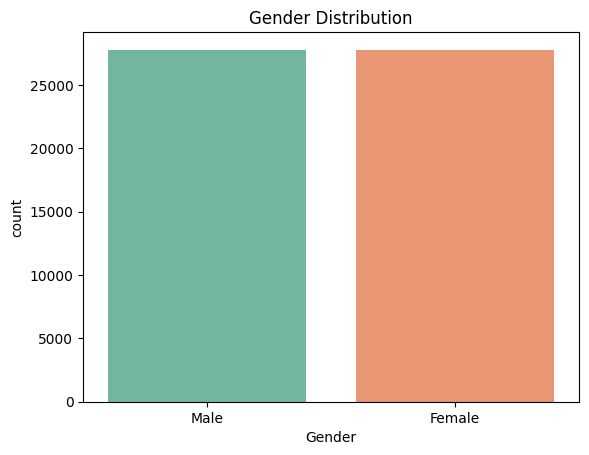

In [6]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()


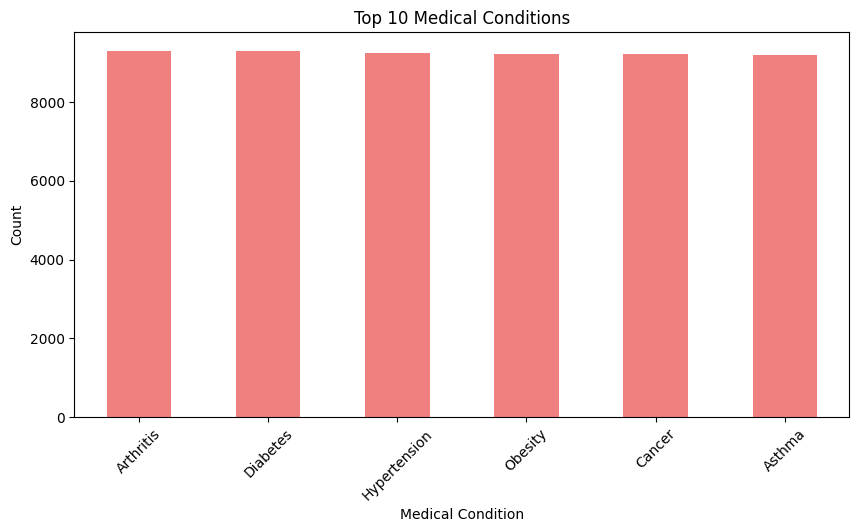

In [7]:
plt.figure(figsize=(10,5))
df['Medical Condition'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title("Top 10 Medical Conditions")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


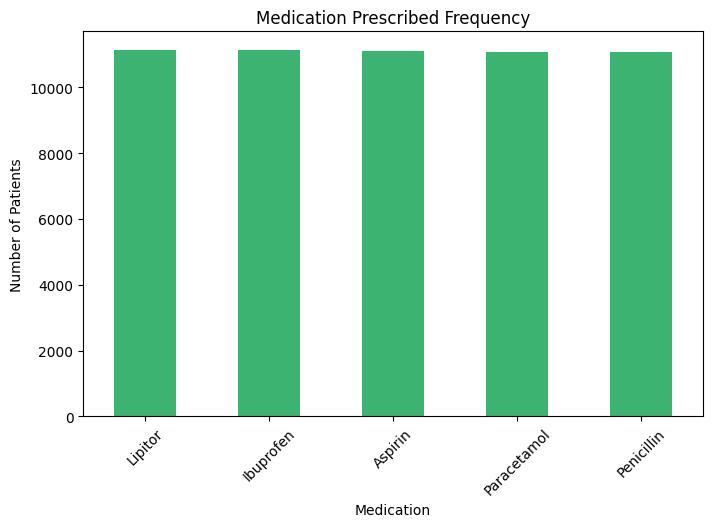

In [8]:
plt.figure(figsize=(8,5))
df['Medication'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title("Medication Prescribed Frequency")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()


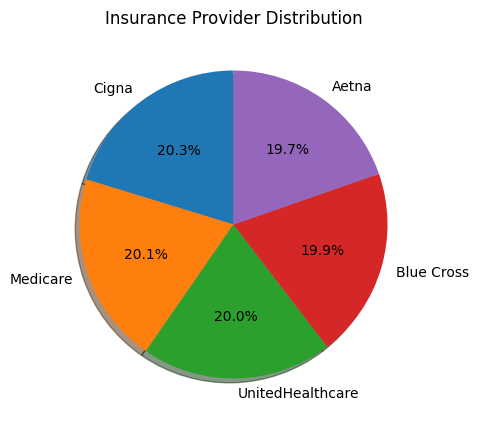

In [9]:
plt.figure(figsize=(8,5))
df['Insurance Provider'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Insurance Provider Distribution")
plt.ylabel("")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_41388\3384753889.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Admission Type', palette='coolwarm')


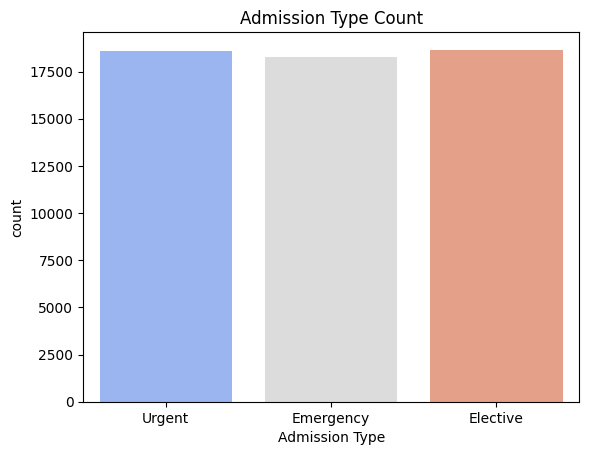

In [10]:
sns.countplot(data=df, x='Admission Type', palette='coolwarm')
plt.title("Admission Type Count")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_41388\497649712.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Test Results', palette='Set3')


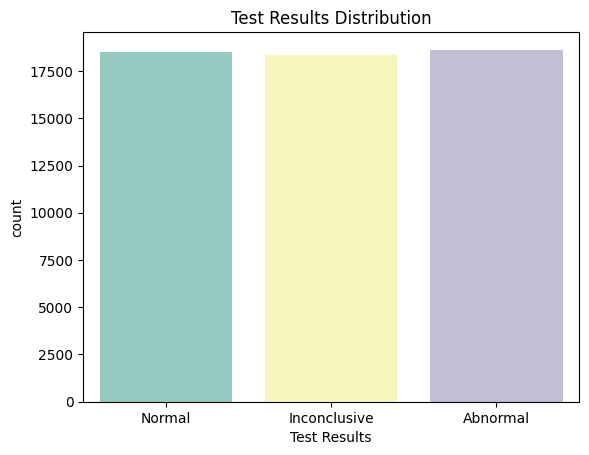

In [11]:
sns.countplot(data=df, x='Test Results', palette='Set3')
plt.title("Test Results Distribution")
plt.show()


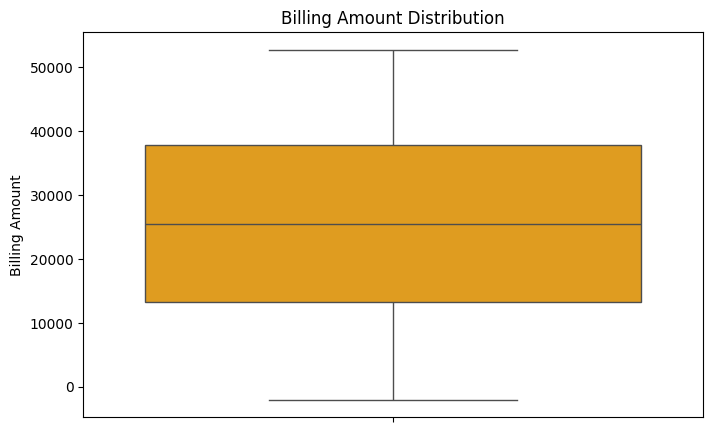

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y='Billing Amount', color='orange')
plt.title("Billing Amount Distribution")
plt.show()


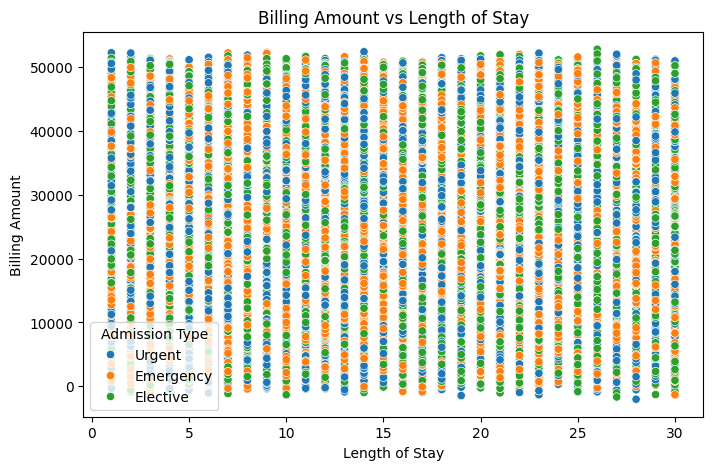

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Length of Stay', y='Billing Amount', hue='Admission Type')
plt.title("Billing Amount vs Length of Stay")
plt.show()


In [14]:
# Avg length of stay
print("Average Length of Stay:", df['Length of Stay'].mean(), "days")

# Most common Medical Condition
print("Most Common Condition:", df['Medical Condition'].mode()[0])

# Top 5 Hospitals by Patient Count
print("\nTop 5 Hospitals:")
print(df['Hospital'].value_counts().head(5))

# Avg billing by Insurance Provider
print("\nAverage Billing by Insurance Provider:")
print(df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values(ascending=False))

# Avg length of stay by Condition
print("\nAverage Stay by Condition:")
print(df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False).head(5))


Average Length of Stay: 15.50900900900901 days
Most Common Condition: Arthritis

Top 5 Hospitals:
Hospital
LLC Smith      44
Ltd Smith      39
Johnson PLC    38
Smith Ltd      37
Smith PLC      36
Name: count, dtype: int64

Average Billing by Insurance Provider:
Insurance Provider
Medicare            25615.990508
Blue Cross          25613.011503
Aetna               25553.294506
Cigna               25525.766314
UnitedHealthcare    25389.172390
Name: Billing Amount, dtype: float64

Average Stay by Condition:
Medical Condition
Asthma          15.696570
Arthritis       15.517404
Cancer          15.495827
Obesity         15.464305
Hypertension    15.458626
Name: Length of Stay, dtype: float64


In [15]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
